## Phase 2

### Header
#### Course Name: 
#### phase #: 2
#### term project name:

### Q Write down the following information: 
#### 1. Problem Statement: 



#### 2. Hypothesis:
   + hypothesis 1:  
   + hypothesis 2:
   + ...

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [1]:
# import your cleaned dataset
import pandas as pd 
df= pd.read_csv('df_for_data_intensive.csv')
df.head()
# display the first five rows data.head(5)

,Percent owner occupied units,Percent renter occupied units,Vacant housing units (percent),Homeowner vacancy rate,Years lived in unit (Date of survey - Year Moved In),Reside in same house as 1 year ago,Lack of plumbing facilities,Lack of kitchen facilities,Overcrowding,Average household size,...,zcta_11433,zcta_11434,zcta_11435,zcta_11436,zcta_11451,zcta_11691,zcta_11692,zcta_11693,zcta_11694,zcta_11697
0,11.553785,68.1,10.651629,7.3,819.0,77.310924,0.000000,7.508532,9.641873,3.25,...,0,0,0,0,0,0,0,0,0,0
1,6.330235,93.3,18.107769,0.0,2124.0,81.092437,0.000000,0.000000,22.038567,3.36,...,0,0,0,0,0,0,0,0,0,0
2,7.348384,72.6,0.689223,0.0,606.0,79.831933,0.000000,0.000000,0.000000,2.73,...,0,0,0,0,0,0,0,0,0,0
3,3.231518,97.7,6.516291,0.0,3204.0,79.131653,0.012634,1.365188,4.958678,2.47,...,0,0,0,0,0,0,0,0,0,0
4,9.473218,86.4,3.132832,0.0,1573.0,93.977591,0.020531,8.873720,9.090909,2.66,...,0,0,0,0,0,0,0,0,0,0


#### 4 EDA  
Read the piazza post for reference https://piazza.com/class/kk6xmjqekrl1e9?cid=154

**4.1 Method 1**

#### operation name: geostpatial analyzation of variables
#### Reason for doing this: the reason for doing this is so that we are able to find locations where the values of a specific variable are. Once found, we hope to see clustering that may help us pic spatial lag features
#### Outcome: 

In [5]:
# code for operation
import geopandas as gpd
gdf = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2020PL/STATE/36_NEW_YORK/36/tl_2020_36_tract10.zip")
gdf['COUNTYFP10'] = gdf['COUNTYFP10'].astype(int)
import matplotlib.pyplot as plt 
import contextily as ctx
imputated_df = df.copy()
dictionary_ = gdf.set_index(['COUNTYFP10','TRACTCE10'])['geometry'].to_dict()
imputated_df['orig_tract'] = imputated_df['tract'].astype(int).astype(str).str.zfill(6)
imputated_df['county'] = imputated_df['county'].str.split('_').apply(lambda x: x[1])
imputated_df['orig_county'] = imputated_df['county'].astype(int)
imputated_df['geometry'] = [dictionary_[tuple(t)] for t in imputated_df[['orig_county','orig_tract']].to_records(index = False)]



C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


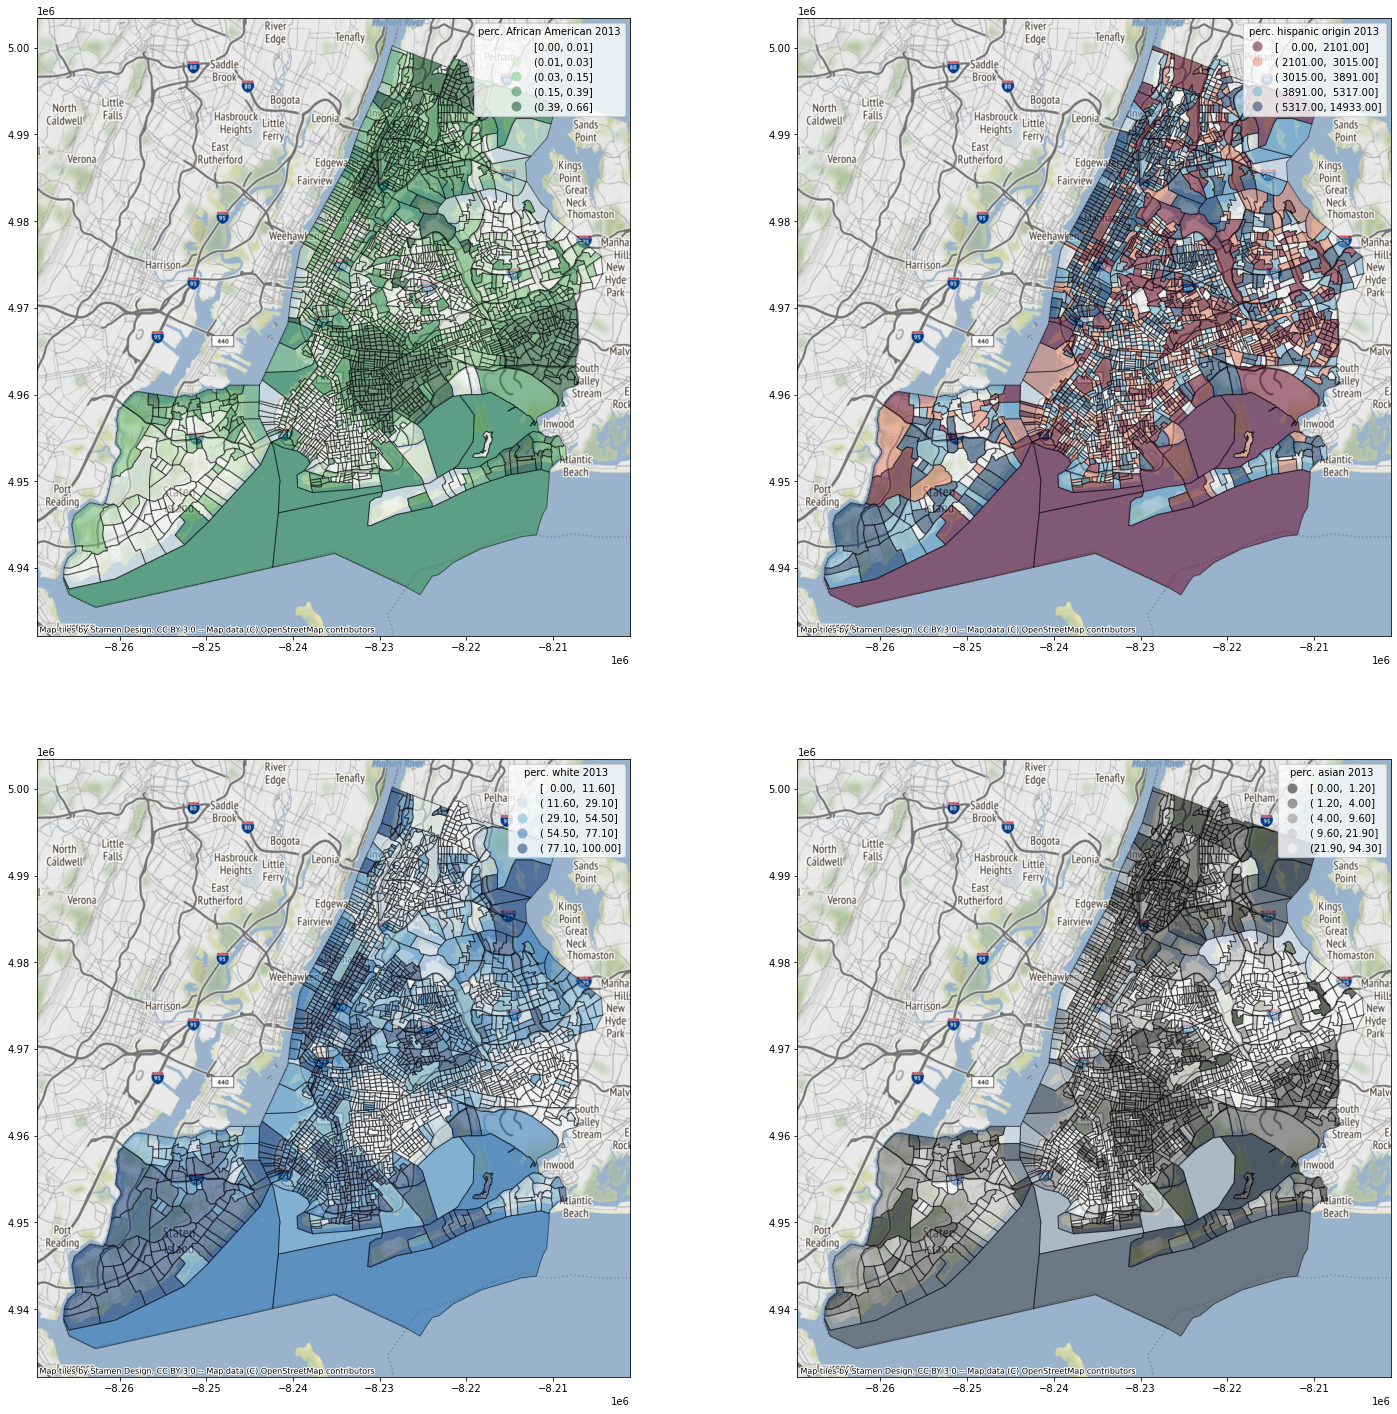

In [6]:
# code for display
gdf_DI = gpd.GeoDataFrame(imputated_df, geometry = 'geometry')
yr_gdf = gdf_DI[gdf_DI['year'] == 2013].copy()
yr_gdf.crs = {'init' :'epsg:4326'}
yr_gdf = yr_gdf.to_crs(epsg=3857)
fig, axs = plt.subplots(2, 2,figsize=(25,25))
yr_gdf.plot(column = 'Percent of people, one race, Black or African American',ax = axs[0,0] ,alpha=0.5, edgecolor='k',cmap='Greens', scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. African American 2013'}) # red is increase tax
yr_gdf.plot(column = 'Percent of people reporting Hispanic origin',ax = axs[0,1] , alpha=0.5, edgecolor='k',cmap= 'RdBu',scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. hispanic origin 2013'}) # 10 decrease in african american  
yr_gdf.plot(column = 'Percent of people, one race, white',ax = axs[1,0] ,alpha=0.5, edgecolor='k',cmap='Blues', scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. white 2013'}) # red is increase tax
yr_gdf.plot(column = 'Percent of people, one race, Asian',ax = axs[1,1] , alpha=0.5, edgecolor='k',cmap= 'gray',scheme='quantiles', figsize=(10, 10),legend = True,legend_kwds={'title': 'perc. asian 2013'}) # 10 decrease in african american 
ctx.add_basemap(axs[0,0])
ctx.add_basemap(axs[0,1])
ctx.add_basemap(axs[1,0])
ctx.add_basemap(axs[1,1])

**4.2 Method 2**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.3 Method 3**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.4 Method 4**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.5 Method 5**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.6 Method 6**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.7 Method 7**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.8 Method 8**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.9 Method 9**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

**4.10 Method 10**

#### operation name:
#### Reason for doing this:
#### Outcome:

In [ ]:
# code for operation

In [ ]:
# code for display

### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline
    5 – with 0-3 valid and non-repeating EDA operations;
    10 – with 4-8 valid and non-repeating EDA operations;
    15 – with 9 valid and non-repeating EDA operations;
    20 - with 10 valid and non-repeating EDA operations;
    25 - Completely master EDA and every step is perfect;
    
Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.
